In [21]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold

## Data prep & Cleaning

In [22]:
path = kagglehub.dataset_download("himelsarder/loan-default-risk-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\asus\.cache\kagglehub\datasets\himelsarder\loan-default-risk-prediction-dataset\versions\1


In [23]:
data = pd.read_csv(path + "\loan_default_risk_dataset.csv")
data.head()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
0,60.0,2996.52,2378.49,0
1,66.4,4137.23,1538.92,1
2,58.5,19865.75,2434.80,1
3,49.8,16855.70,2677.82,1
4,67.3,7902.37,2206.72,0


In [24]:
data.isna().sum()

Retirement_Age       0
Debt_Amount          1
Monthly_Savings      2
Loan_Default_Risk    0
dtype: int64

In [25]:
data.dropna(inplace=True)

In [26]:
data.duplicated().sum()

0

In [27]:
data.drop_duplicates(inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 299
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retirement_Age     297 non-null    float64
 1   Debt_Amount        297 non-null    float64
 2   Monthly_Savings    297 non-null    float64
 3   Loan_Default_Risk  297 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 11.6 KB


## Visualisasi

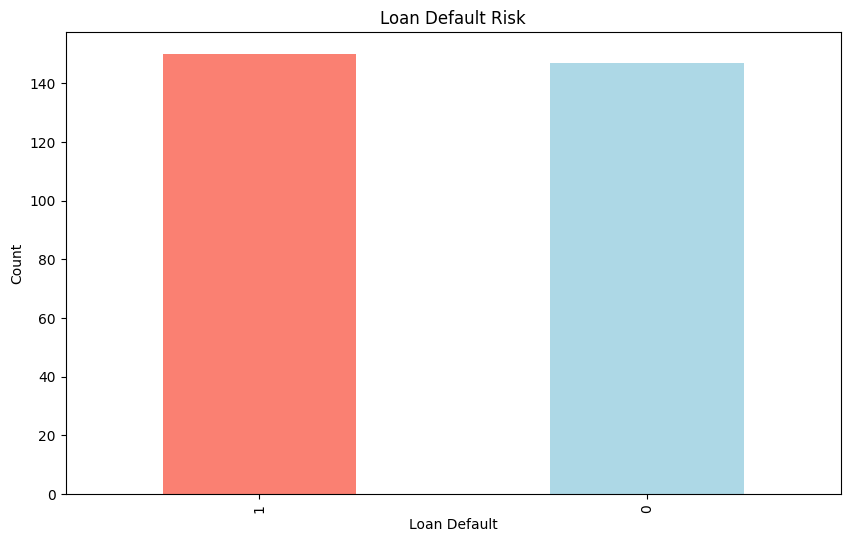

In [29]:

plt.figure(figsize=(10, 6))
data["Loan_Default_Risk"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Loan Default Risk")
plt.xlabel("Loan Default")
plt.ylabel("Count")
plt.show()

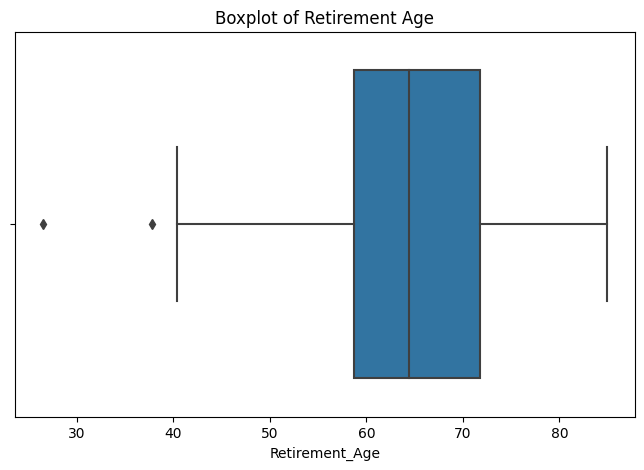

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Retirement_Age'])
plt.title('Boxplot of Retirement Age')
plt.show()

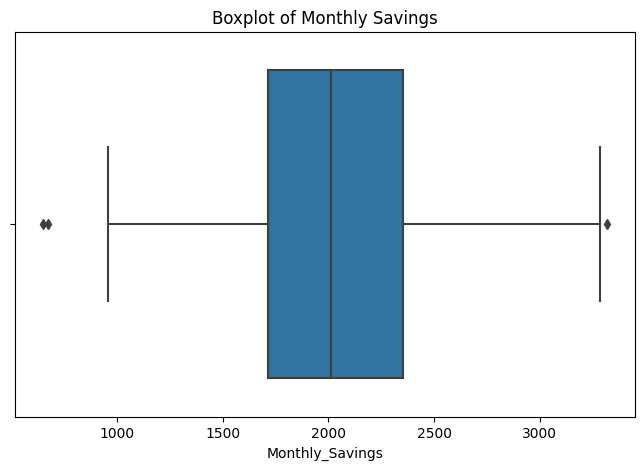

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Monthly_Savings'])
plt.title('Boxplot of Monthly Savings')
plt.show()

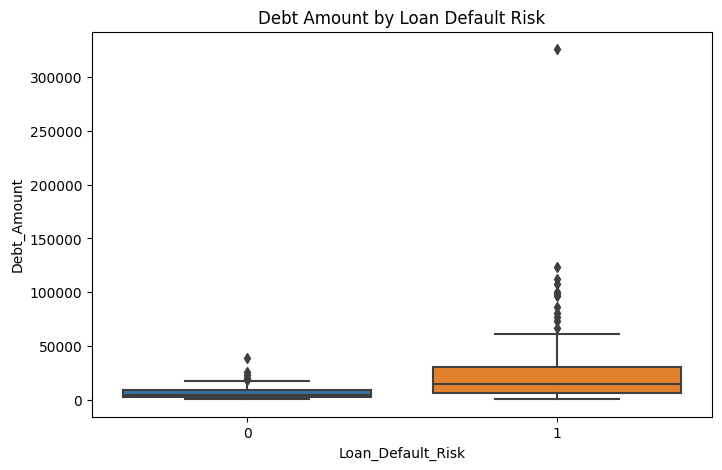

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Default_Risk', y='Debt_Amount', data=data)
plt.title('Debt Amount by Loan Default Risk')
plt.show()


## Split & Predict

In [33]:
X = data.drop("Loan_Default_Risk", axis=1)
y = data["Loan_Default_Risk"]

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_importances = pd.DataFrame({'Feature': ['Retirement_Age', 'Debt_Amount', 'Monthly_Savings'],
                                    'Importance': rf_model.feature_importances_})
print("\nFeature Importances:\n", feature_importances.sort_values(by='Importance', ascending=False))

Accuracy Score: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.93      0.96      0.95        27

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60


Confusion Matrix:
 [[31  2]
 [ 1 26]]

Feature Importances:
            Feature  Importance
2  Monthly_Savings    0.368235
1      Debt_Amount    0.335125
0   Retirement_Age    0.296639


In [36]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf_model, X_scaled, y, cv=cv, scoring='accuracy')

print(f"Cross Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross Validation Accuracy Scores: [0.93333333 0.93333333 0.98305085 0.94915254 0.93220339]
Mean Accuracy: 0.9462
Standard Deviation: 0.0195
